In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import sem,t
import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Datasets/loans_income.csv")
df

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [3]:
loans_income=np.array(pd.read_csv("Datasets/loans_income.csv"))
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]], dtype=int64)

In [4]:
#Making a flat list from list of lists
loans_income=np.array([item for sublist in loans_income for item in sublist])

In [5]:
def bootstrap(l,R):
  n=len(loans_income)
  #Number of bootstrap samples
  means_of_boot_samples=[]
  for steps in range(R):
    #Steps 1,2
    boot_sample=np.random.choice(loans_income,size=n)
    #step 3
    means_of_boot_samples.append(round(np.mean(boot_sample),3))
  return means_of_boot_samples

bootstrap(loans_income,5)

[68771.351, 68825.825, 68729.521, 68724.252, 69006.763]

In [6]:
np.std(bootstrap(loans_income,100))

150.50479405804325

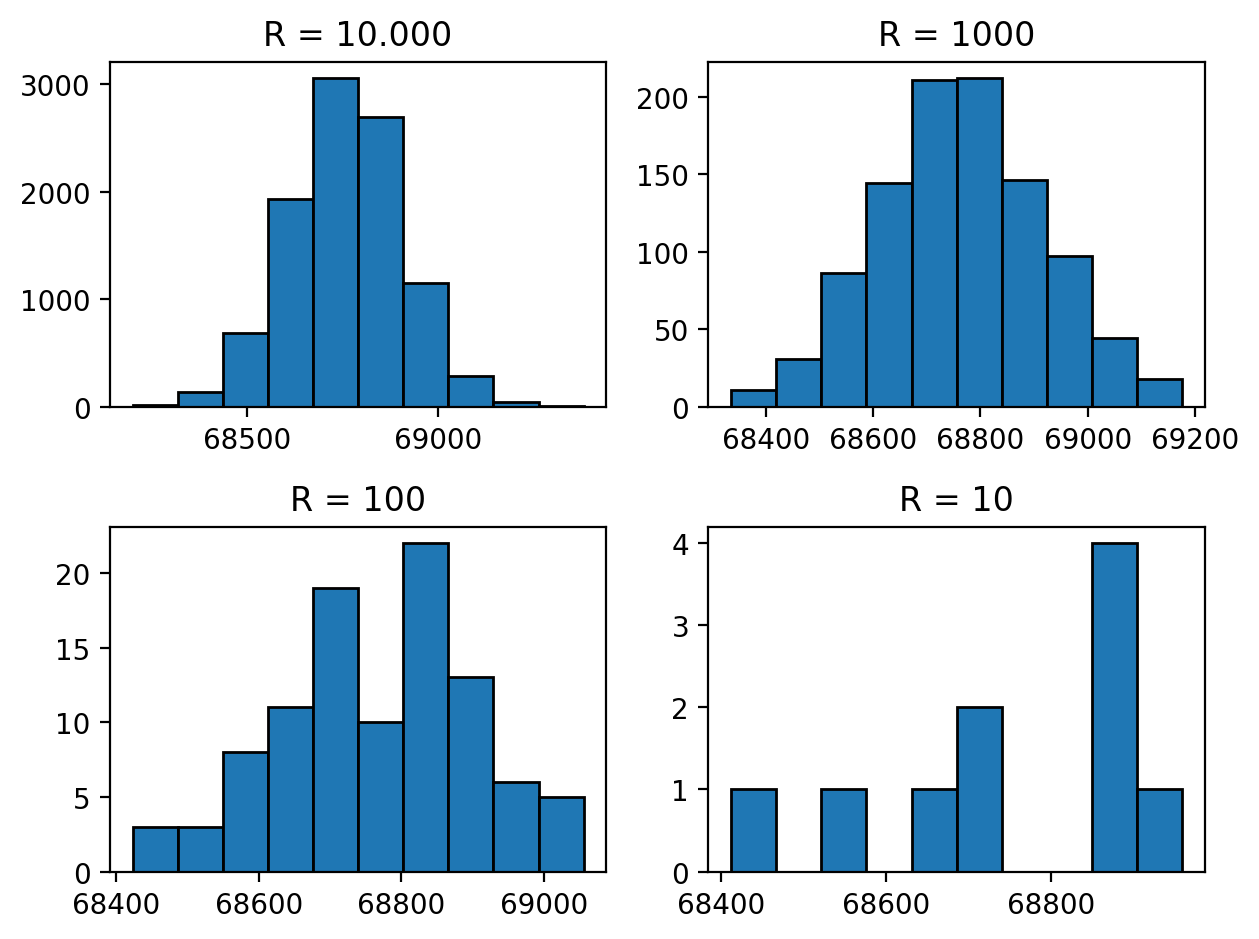

In [7]:
#Plot histogram
plt.figure(dpi=200)

plt.subplot(221)
plt.title("R = 10.000")
plt.hist(bootstrap(loans_income, 10000),edgecolor="k")

plt.subplot(222)
plt.title("R = 1000")
plt.hist(bootstrap(loans_income, 1000),edgecolor="k")

plt.subplot(223)
plt.title("R = 100")
plt.hist(bootstrap(loans_income, 100),edgecolor="k")

plt.subplot(224)
plt.title("R = 10")
plt.hist(bootstrap(loans_income, 10),edgecolor="k")

plt.tight_layout()

In [8]:
#Find a confidence interval
data=bootstrap(loans_income,1000)
lower_lim, upper_lim = np.percentile(data,2.5), np.percentile(data, 95)
print("Lower Limit: ", lower_lim)
print("Upper Limit: ", upper_lim)

Lower Limit:  68491.8961
Upper Limit:  69004.28115


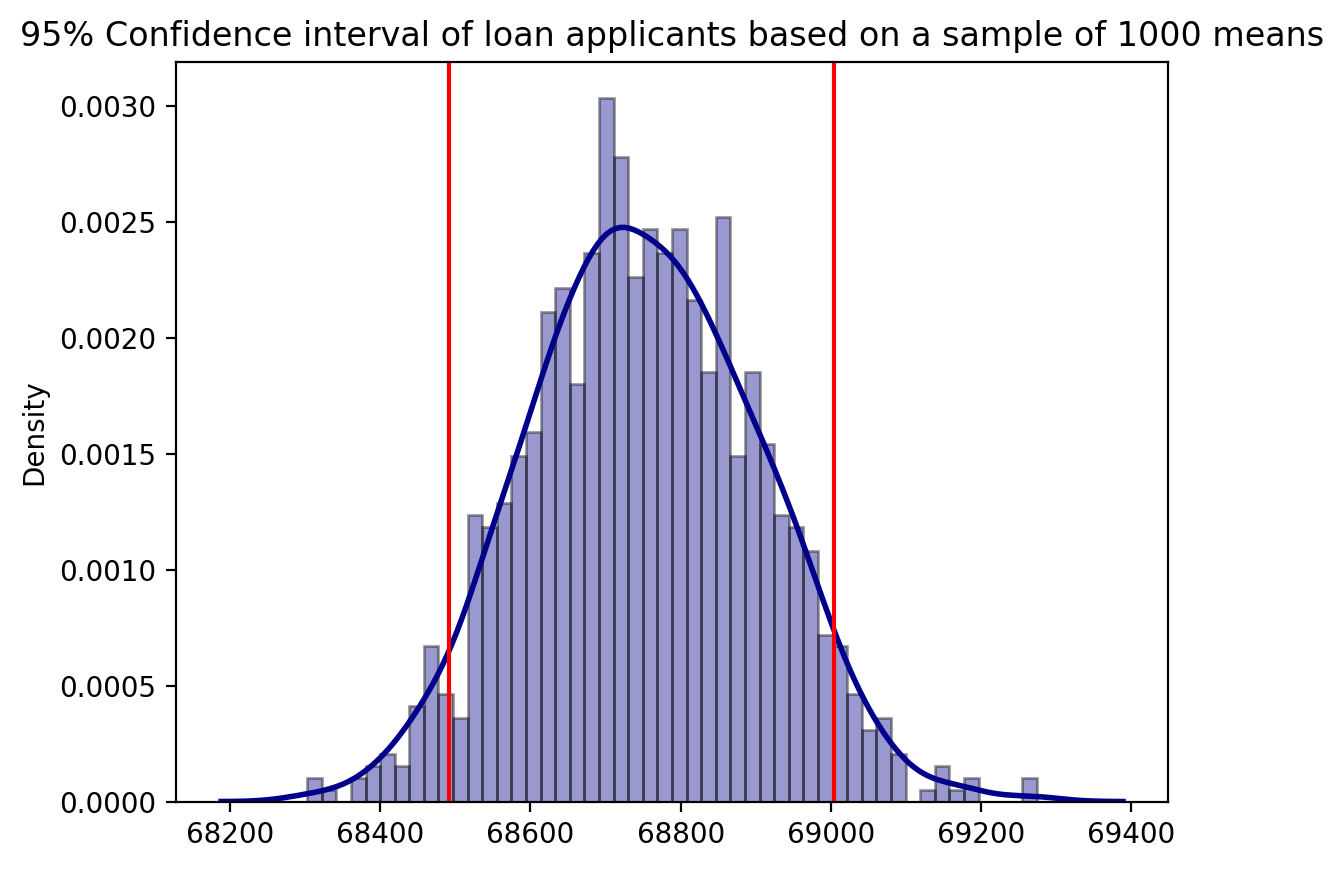

In [9]:
plt.figure(dpi=200)
plt.title("95% Confidence interval of loan applicants based on a sample of 1000 means")

sns.distplot(bootstrap(loans_income,1000),hist=True,kde=True,
             color="darkblue",bins=50,
             hist_kws={"edgecolor":"black"},
             kde_kws={"linewidth":2})

plt.axvline(x=lower_lim,color="red")
plt.axvline(x=upper_lim,color="red")